In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df =  pd.read_csv("survey_results_public.csv")

In [11]:
df_usa  = df[df["Country"].notnull()]

In [13]:
df_usa_sal = df_usa[(df_usa["CompTotal"].notnull()) & (df_usa["CompFreq"] == "Yearly")]

In [14]:
df_usa_sal

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
11,12,I am a developer by profession,Employed full-time,Spain,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent;Hispanic or Latin...,None of the above,None of the above,Too long,Easy,46482.0
12,13,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Other (please specify):,15,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Appropriate in length,Easy,77290.0
17,18,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,9,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,46135.0
23,24,I am a developer by profession,Employed full-time,France,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School;Online Courses or Certification,9,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,38915.0
24,25,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School;Friend or family member,26,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,77831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83424,83425,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",17,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,"Or, in your own words:",Appropriate in length,Easy,129718.0
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
83432,83433,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School,5,...,18-24 years old,Woman,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Easy,80169.0
83433,83434,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Online Forum;Online Courses or Certification;O...,15,...,25-34 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,I have an anxiety disorder,Appropriate in length,Easy,18326.0


In [15]:
df = df_usa_sal [["Country","EdLevel", "YearsCodePro","Employment", "CompTotal"]]

In [16]:
df = df.rename({'CompTotal': 'Salary'}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,43000.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,71500.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,61000.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,Employed full-time,36000.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,Employed full-time,72000.0


In [18]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24976 entries, 11 to 83434
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       24976 non-null  object 
 1   EdLevel       24976 non-null  object 
 2   YearsCodePro  24976 non-null  object 
 3   Employment    24976 non-null  object 
 4   Salary        24976 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [20]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23011 entries, 11 to 83434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23011 non-null  object 
 1   EdLevel       23011 non-null  object 
 2   YearsCodePro  23011 non-null  object 
 3   Salary        23011 non-null  float64
dtypes: float64(1), object(3)
memory usage: 898.9+ KB


In [21]:
df['Country'].value_counts()

United States of America                                8530
United Kingdom of Great Britain and Northern Ireland    2331
India                                                   2171
Germany                                                 1825
Canada                                                  1420
                                                        ... 
Honduras                                                   1
Iraq                                                       1
Côte d'Ivoire                                              1
Uzbekistan                                                 1
Mozambique                                                 1
Name: Country, Length: 121, dtype: int64

In [24]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map


In [25]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                8530
other                                                   3540
United Kingdom of Great Britain and Northern Ireland    2331
India                                                   2171
Germany                                                 1825
Canada                                                  1420
France                                                   947
Australia                                                707
Spain                                                    662
Italy                                                    440
Netherlands                                              438
Name: Country, dtype: int64

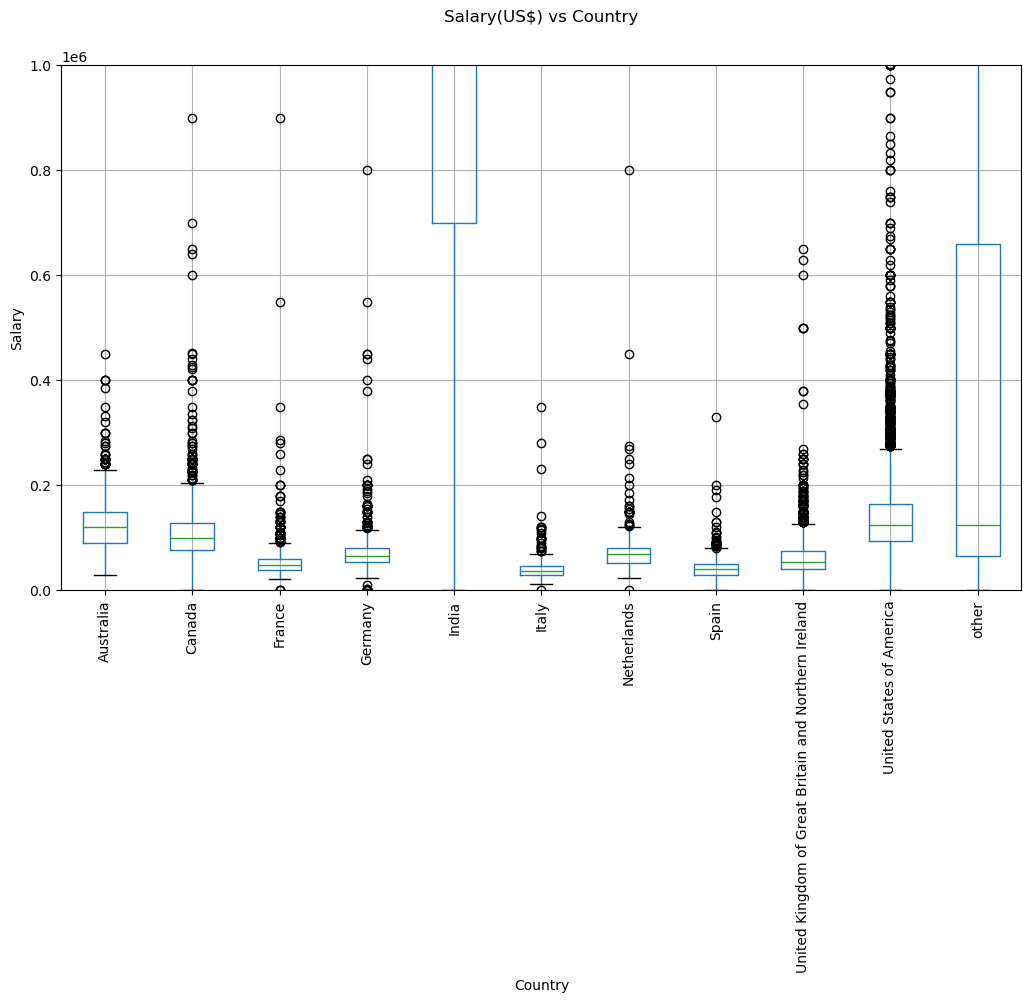

In [30]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax= ax)
ax.set_ylim(0, 1e6)
plt.suptitle('Salary(US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [27]:
df

,Country,EdLevel,YearsCodePro,Salary
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,43000.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,71500.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,61000.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,36000.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,72000.0
...,...,...,...,...
83420,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,33000.0
83424,Germany,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,120000.0
83430,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21,125000.0
83432,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Less than 1 year,106000.0


In [31]:
df = df[df["Salary"] <= 2500000]
df = df[df["Salary"] >= 10000]

df = df[df['Country'] != 'Other']

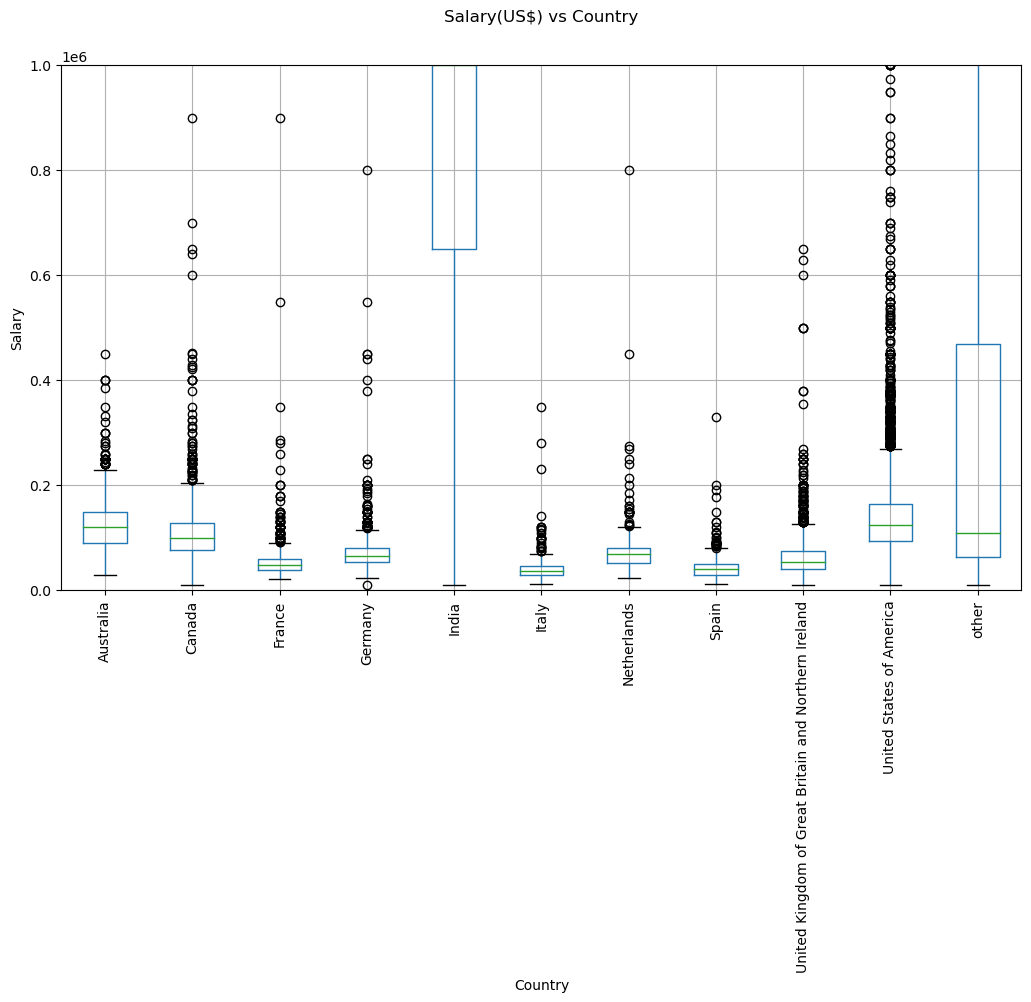

In [32]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax= ax)
ax.set_ylim(0, 1e6)
plt.suptitle('Salary(US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df [ 'YearsCodePro'].unique()

array(['5', '6', '2', '18', '21', '10', 'Less than 1 year', '15', '3',
       '12', '16', '8', '17', '1', '14', '7', '26', '34', '11', '25', '4',
       '24', '22', '13', '9', '39', '20', '27', '23', '35', '19', '33',
       '37', '30', '43', '40', '29', '31', '42', '28', '46', '32', '36',
       '38', '45', '44', '41', 'More than 50 years', '50', '47', '49',
       '48'], dtype=object)

In [34]:
def clean_experience(x):

    if x == 'More than 50 years':
        return 50.0
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [35]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([1, 2, 7, 3, 8, 4, 0, 5, 6])

In [37]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([ 7,  3,  1,  2, 10,  8,  9,  5,  6,  0,  4])

In [38]:
X = df.drop("Salary", axis=1)
y = df['Salary']

In [39]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [40]:
y_pred = linear_reg.predict(X)

In [41]:
from sklearn.metrics  import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_absolute_error(y,y_pred))

In [42]:
error

458.7705464926494

In [45]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X,y.values)


DecisionTreeRegressor(random_state=0)

In [46]:
y_pred = dec_tree_reg.predict(X)

In [47]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$222,313.06


In [48]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X , y.values)


RandomForestRegressor(random_state=0)

In [49]:
y_pred = random_forest_reg.predict(X)

In [50]:
error =np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$222,723.99


In [51]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters ={"max_depth" : max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')

gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [52]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("$(:,.02f)".format(error))

$(:,.02f)


In [53]:
X

,Country,EdLevel,YearsCodePro
11,7,1,5.0
12,3,2,6.0
17,1,1,6.0
23,2,2,2.0
24,3,2,18.0
...,...,...,...
83420,2,2,4.0
83424,3,1,12.0
83430,9,2,21.0
83432,1,1,0.5


In [63]:
X = np.array([["United States of America", 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 15]])

X

array([['United States of America',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', '15']],
      dtype='<U47')

In [64]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_education.transform(X[:,1])

X= X.astype(float)
X

array([[ 9.,  2., 15.]])

In [65]:
y_pred= regressor.predict(X)
y_pred

c:\Users\vivek sharma\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([164468.03015176])

In [66]:
import pickle


In [68]:
data = {'model': regressor, "le_country": le_country, "le_education": le_education}

with open('saved_steps.pkl' , 'wb') as file:
    pickle.dump(data, file)

In [69]:


with open('saved_steps.pkl' , 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [70]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\vivek sharma\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([164468.03015176])